<a href="https://colab.research.google.com/github/renyuanL/ryFinTech2021/blob/main/Sharpe_ratio_is_not_so_sharp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Watch Out for the Sharpe Ratio!

Sharpe Ratio is one of the top metrics used by traders and investors to evaluate their trading strategy/investment systems. This notebook accompanies the [Blogpost](http://aaaquants.com/2020/02/07/twisting-the-sharpe-ratio/) to illustrate the importance of using rigorous approaches to evaluate our trading strategies, at least not relying on a single performance metric alone. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [2]:
# Download the Adjusted Close data for AMZN
pep = pdr.get_data_yahoo('AMZN')['Adj Close']


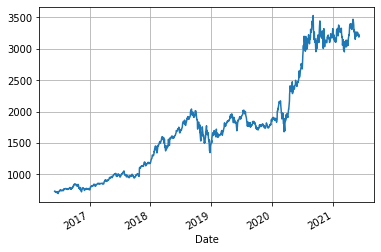

In [3]:
pep.plot(grid=True)

### Constructing the backtest

__Buy and hold strategy__

In [4]:
# This indicates whether we have a position on or not
inpos = 0

# Hold for 60 days
hold_period = timedelta(60)

wait = 0

# This is the PnL
pnl = []
pos = []
time_in_trade = []

In [5]:
for date in pep.index:
    
    if inpos == 0 and wait == 2:
        entry_price = pep[date]
        open_time = date
        inpos = 1
        
    elif inpos == 1 and date-open_time >= hold_period:
        #Profit/loss for this trade
        p = pep[date] - entry_price
        pnl.append(p)
        inpos = 0
    
    elif inpos == 0 and wait < 2:
        wait += 1
        
    pos.append(inpos)

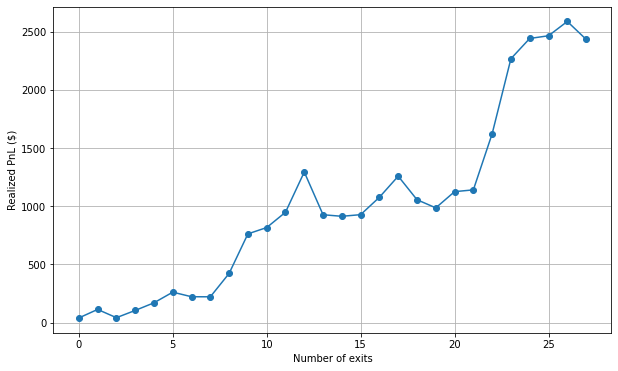

In [6]:
# Cumulative profit per trade
fig = plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pnl),'-o')
plt.xlabel('Number of exits')
plt.ylabel('Realized PnL ($)')
plt.grid()
plt.show()

__Daily return__

In [7]:
# Daily return
pos1 = [0] + pos 
daily_ret = pep.pct_change()*pos1[:-1]

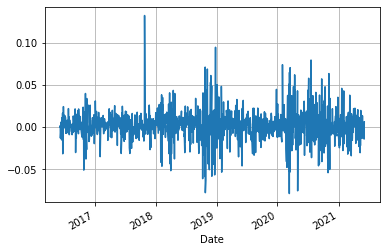

In [8]:
daily_ret.plot(grid=True)
plt.show()

### Sharpe Ratio

In [9]:
# Annualised Sharpe ratio
sharpe = np.mean(daily_ret)/np.std(daily_ret)*np.sqrt(252)
sharpe

1.1316987031130725

### Profit per trade

In [10]:
pnl_sort = sorted(pnl)
pnl_sort

[-367.0198974609375,
 -202.06005859375,
 -153.27001953125,
 -70.8800048828125,
 -70.02001953125,
 -39.300048828125,
 -13.300048828125,
 -0.60003662109375,
 14.0400390625,
 15.3699951171875,
 23.16015625,
 39.91998291015625,
 54.1500244140625,
 62.19000244140625,
 65.5999755859375,
 73.4000244140625,
 91.38995361328125,
 122.7998046875,
 131.52001953125,
 139.2099609375,
 149.580078125,
 173.719970703125,
 180.8699951171875,
 200.8599853515625,
 339.68994140625,
 345.550048828125,
 481.7601318359375,
 644.820068359375]

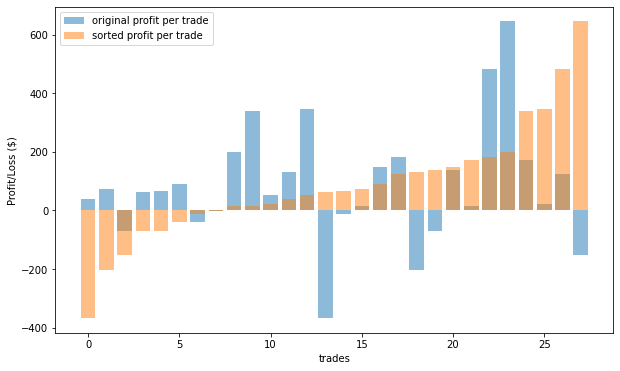

In [11]:
# Plotting profit per trade
fig = plt.figure(figsize=(10, 6))
x = range(len(pnl))
plt.bar(x, pnl, alpha=0.5)
plt.bar(x, pnl_sort, alpha=0.5)
plt.ylabel('Profit/Loss ($)')
plt.xlabel('trades')
plt.legend(['original profit per trade', 'sorted profit per trade'])
plt.show()

In [12]:
pnl = [0] + pnl
pnl_sort = [0] + pnl_sort

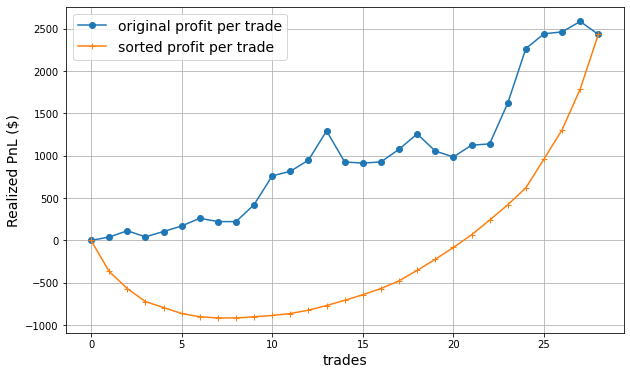

In [13]:
# Cumulative profit per trade
fig = plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pnl),'-o')
plt.plot(np.cumsum(pnl_sort),'-+')
plt.legend(['original profit per trade', 'sorted profit per trade'], fontsize=14)
plt.xlabel('trades', fontsize=14)
plt.ylabel('Realized PnL ($)', fontsize=14)
plt.grid()
plt.show()

### Shannon Entropy

In [14]:
from math import log

#### For a perfectly efficient market scenario

In this situation, the probability of making a profit for each trade is precisely 0.5.

In [15]:
n = len(pnl)
n

29

In [16]:
# The Shannon Entropy
H3 = -n*0.5*log(0.5, 2)
H3

14.5

### Sharpe ratio for BTC and S&P500

In [17]:
!wget https://raw.githubusercontent.com/aaaquants/Python_for_traders_and_investors/master/BTC20200128.csv

--2021-06-05 15:58:30--  https://raw.githubusercontent.com/aaaquants/Python_for_traders_and_investors/master/BTC20200128.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30529 (30K) [text/plain]
Saving to: ‘BTC20200128.csv.1’

BTC20200128.csv.1   100%[===================>]  29.81K  --.-KB/s    in 0s      

2021-06-05 15:58:30 (115 MB/s) - ‘BTC20200128.csv.1’ saved [30529/30529]



In [18]:
# The Bitcoin data
btc = pd.read_csv('BTC20200128.csv')
btc.set_index('Unnamed: 0', inplace=True)

# Convert the index to datetime
btc.index = pd.to_datetime(btc.index)
btc

,BTC_close
Unnamed: 0,
2015-08-07,277.89
2015-08-08,258.60
2015-08-09,263.87
2015-08-10,263.30
2015-08-11,269.03
...,...
2020-01-24,8431.78
2020-01-25,8345.88
2020-01-26,8602.37


In [19]:
# Filtering out dates older than 2015-08-12
btc = btc[btc.index >= '2015-08-12']

In [20]:
# Download the Adjusted Close data for S&P500
s_500 = pdr.get_data_yahoo('SPY', start='2015-08-12', end='2020-01-28')['Adj Close']

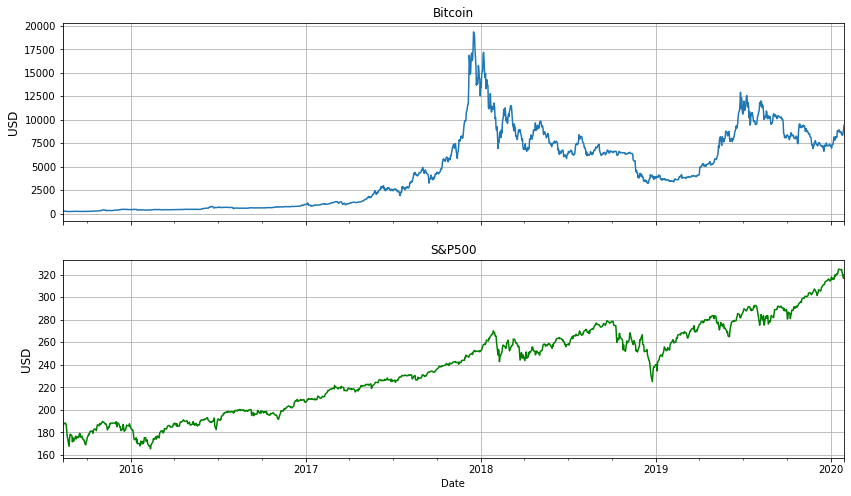

In [21]:
fig = plt.figure(figsize=(14, 8))
ax1 = plt.subplot(211)
btc['BTC_close'].plot()
plt.title('Bitcoin')
plt.ylabel('USD', fontsize=12)
plt.grid()

# Share the same axis
ax2 = plt.subplot(212, sharex = ax1)
s_500.plot(color='g')
plt.title('S&P500')
plt.ylabel('USD', fontsize=12)
plt.grid()
plt.show()

In [22]:
#pep = btc['BTC_close']
pep = s_500

In [23]:
# This indicates whether we have a position on or not
inpos = 0

# Hold for 60 days
hold_period = timedelta(60)

wait = 0

# This is the PnL
pnl = []
pos = []
time_in_trade = []

In [24]:
for date in pep.index:
    
    if inpos == 0 and wait == 2:
        entry_price = pep[date]
        open_time = date
        inpos = 1
        
    elif inpos == 1 and date-open_time >= hold_period:
        #Profit/loss for this trade
        p = pep[date] - entry_price
        pnl.append(p)
        inpos = 0
    
    elif inpos == 0 and wait < 2:
        wait += 1
        
    pos.append(inpos)

In [25]:
# Daily return
pos1 = [0] + pos 
daily_ret = pep.pct_change()*pos1[:-1]

In [26]:
# Annualised Sharpe ratio
sharpe = np.mean(daily_ret)/np.std(daily_ret)*np.sqrt(252)
sharpe

0.9891724369753659